# chipotle (family restaurant data)

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 1. data

In [242]:
data = r"C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Data_TIL\Practice\data\chipotle.tsv"

df_chipotle = pd.read_csv(data, delimiter='\t')  # pandas tsv file open
df_chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [243]:
df_chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [244]:
df_chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [245]:
df_chipotle.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### 2. preprocessing

##### 2-1. 주문별 주문 금액 합

In [246]:
df_chipotle["item_price"] = df_chipotle["item_price"].str[1:].astype(np.float64)
df_chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [247]:
df_chipotle_price = df_chipotle.groupby("order_id")["item_price"].sum()
df_chipotle_price

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

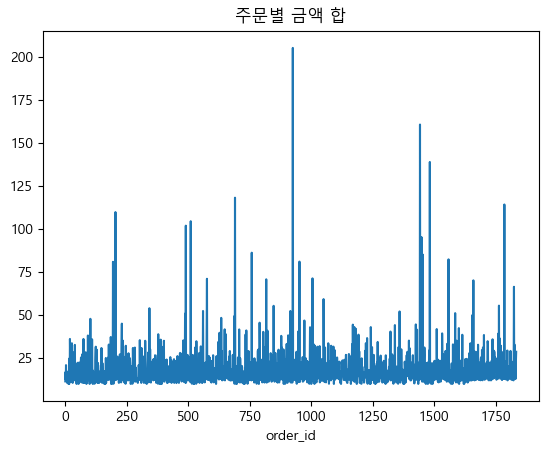

In [248]:
df_chipotle_price.plot()
plt.rc("font", family="Malgun Gothic")
plt.title("주문별 금액 합")
plt.show()


##### 2-2. 2개 이상의 주문 판매량 Top5

In [249]:
df_chipotle_quantity_over2 = df_chipotle[df_chipotle["quantity"] >= 2]
df_chipotle_quantity_over2

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
18,9,2,Canned Soda,[Sprite],2.18
51,23,2,Canned Soda,[Mountain Dew],2.18
135,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",22.50
148,67,2,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Chees...",17.98
...,...,...,...,...,...
4491,1786,4,Canned Soft Drink,[Sprite],5.00
4499,1789,2,Canned Soft Drink,[Coke],2.50
4560,1812,2,Canned Soft Drink,[Coke],2.50
4561,1813,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",17.50


In [250]:
df_chipotle_quantity_over2_top5 = df_chipotle_quantity_over2.groupby("item_name")["quantity"].sum().nlargest(5)
df_chipotle_quantity_over2_top5

item_name
Canned Soft Drink      87
Bottled Water          72
Chicken Burrito        70
Chicken Bowl           68
Chips and Guacamole    51
Name: quantity, dtype: int64

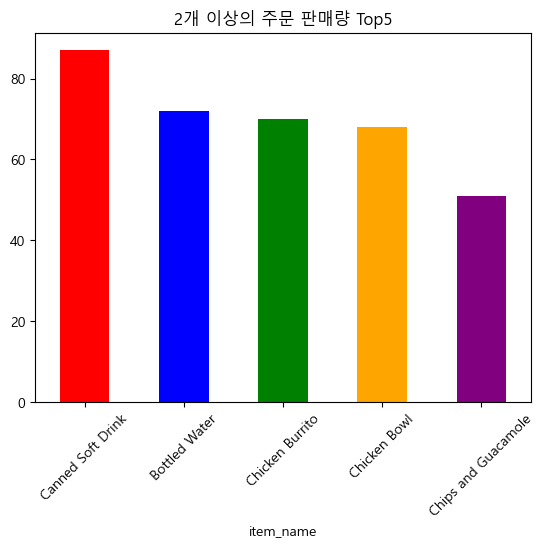

In [251]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

df_chipotle_quantity_over2_top5.plot(kind="bar", rot=45, color=colors)
plt.rc("font", family="Malgun Gothic")
plt.title("2개 이상의 주문 판매량 Top5")
plt.show()

##### 2-3. 가장 많이 판매된 품목 Top10

In [252]:
df_chipotle_top10 = df_chipotle["item_name"].value_counts(ascending=False)[:10]
df_chipotle_top10

item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64

In [253]:
df_chipotle_top10 = df_chipotle.groupby("item_name")["quantity"].sum().nlargest(10)
df_chipotle_top10 = df_chipotle_top10.to_frame(name="count")
df_chipotle_top10.reset_index(inplace=True)
df_chipotle_top10

,item_name,count
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351
5,Chips,230
6,Steak Bowl,221
7,Bottled Water,211
8,Chips and Fresh Tomato Salsa,130
9,Canned Soda,126


[]

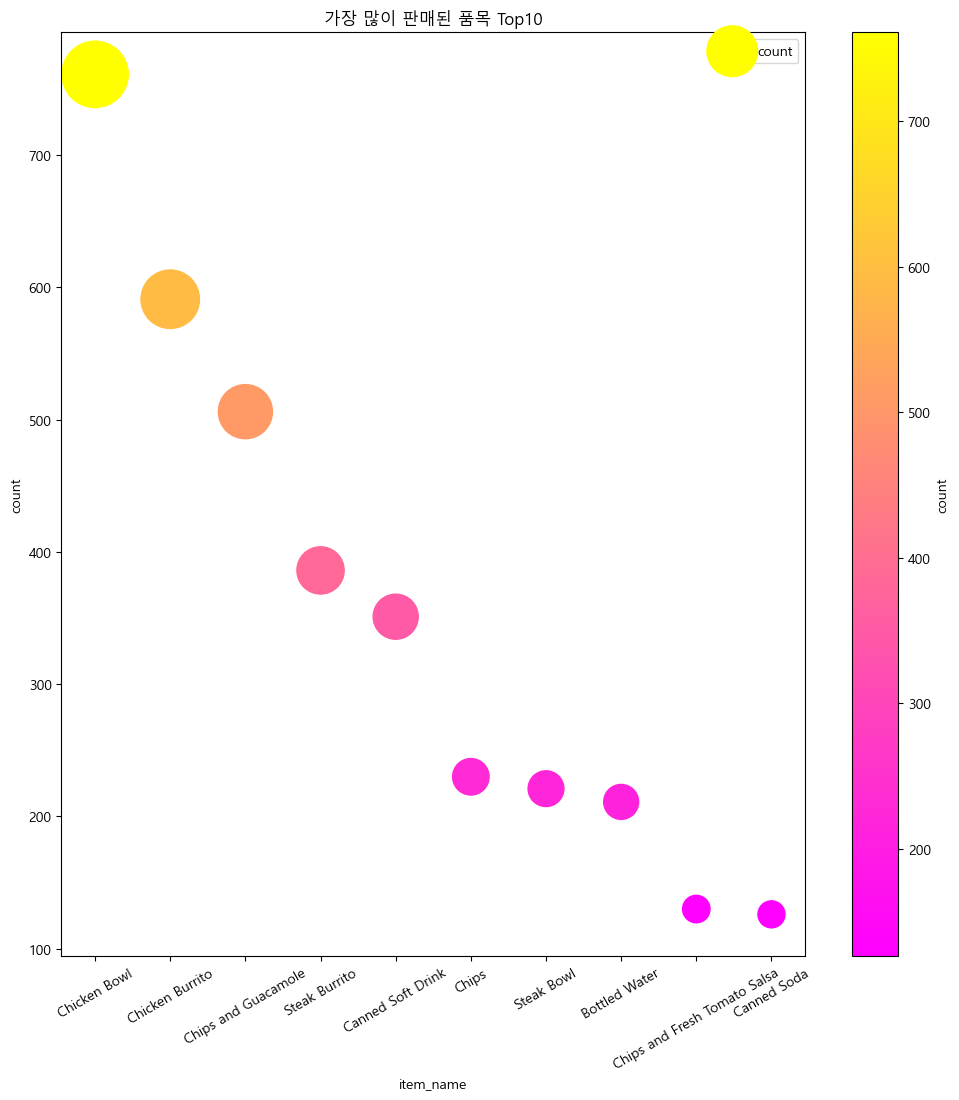

In [254]:
size_arr = df_chipotle_top10["count"] * 3

df_chipotle_top10.plot(kind="scatter", x="item_name", y="count", 
                       rot=30, figsize=(12,12), fontsize=10, 
                       s=size_arr, label="count", c="count", 
                       cmap="spring")

plt.rc("font", family="Malgun Gothic")
plt.title("가장 많이 판매된 품목 Top10")
plt.legend()
plt.plot()

##### 2-4. 메뉴, 주문 개수별 가격 

In [255]:
df_chipotle["item_price_per_one"] = df_chipotle["item_price"] / df_chipotle["quantity"]
df_chipotle

,order_id,quantity,item_name,choice_description,item_price,item_price_per_one
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [256]:
df_chipotle_price_differ = df_chipotle.groupby(["item_name", "quantity", "item_price_per_one"])["item_price_per_one"].count()
df_chipotle_price_differ = df_chipotle_price_differ.to_frame(name="count")
df_chipotle_price_differ.reset_index(inplace=True)
df_chipotle_price_differ

,item_name,quantity,item_price_per_one,count
0,6 Pack Soft Drink,1,6.49,53
1,6 Pack Soft Drink,2,6.49,1
2,Barbacoa Bowl,1,8.69,3
3,Barbacoa Bowl,1,8.99,8
4,Barbacoa Bowl,1,9.25,28
...,...,...,...,...
204,Veggie Salad Bowl,1,11.25,10
205,Veggie Soft Tacos,1,8.49,2
206,Veggie Soft Tacos,1,8.75,2
207,Veggie Soft Tacos,1,11.25,2


- 주문별로 같은 메뉴이지만 금액이 다른 경우 있음

##### 2-5. 가장 많이 사용되는 ingredients TOP10

In [257]:
# 데이터 형태 확인

df_chipotle[:30]

,order_id,quantity,item_name,choice_description,item_price,item_price_per_one
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


In [258]:
print(df_chipotle.iloc[4619]["choice_description"])
print(type(df_chipotle.iloc[4619]["choice_description"]))

[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]
<class 'str'>


In [259]:
df_chipotle_choice_description_str = df_chipotle["choice_description"]
df_chipotle_choice_description_str = df_chipotle_choice_description_str.str.strip('[')
df_chipotle_choice_description_str = df_chipotle_choice_description_str.str.replace(']','')
df_chipotle_choice_description_str = df_chipotle_choice_description_str.str.replace(',','&')
df_chipotle_choice_description_str = df_chipotle_choice_description_str.str.replace(' ', '')
df_chipotle_choice_description_str = df_chipotle_choice_description_str.str.split('[')
df_chipotle_choice_description_str

0                                                     NaN
1                                            [Clementine]
2                                                 [Apple]
3                                                     NaN
4       [Tomatillo-RedChiliSalsa(Hot)&, BlackBeans&Ric...
                              ...                        
4617    [FreshTomatoSalsa&, Rice&BlackBeans&SourCream&...
4618    [FreshTomatoSalsa&, Rice&SourCream&Cheese&Lett...
4619    [FreshTomatoSalsa&, FajitaVegetables&PintoBean...
4620        [FreshTomatoSalsa&, FajitaVegetables&Lettuce]
4621    [FreshTomatoSalsa&, FajitaVegetables&PintoBean...
Name: choice_description, Length: 4622, dtype: object

In [260]:
(df_chipotle_choice_description_str.apply(lambda x: len(x) if isinstance(x, list) else x) > 2).sum()  # 형태 확인

0

In [261]:
# [data], [data, [data]], [[data], [data]] 형태에 대한 분할
# 살사와 재료들을 분리

def parse_list(ingre_li):
    if isinstance(ingre_li, list):
        return_li = []
        for ingre in ingre_li:
            temp_li = []
            ingres = ingre.strip('&')
            ingres = ingres.split('&')
            for ingre in ingres:
                temp_li.append(ingre)
            return_li.append(temp_li)
        return return_li
    else:
        pass
    
df_chipotle_choice_description_str = df_chipotle_choice_description_str.apply(parse_list)
df_chipotle_choice_description_str


0                                                    None
1                                          [[Clementine]]
2                                               [[Apple]]
3                                                    None
4       [[Tomatillo-RedChiliSalsa(Hot)], [BlackBeans, ...
                              ...                        
4617    [[FreshTomatoSalsa], [Rice, BlackBeans, SourCr...
4618    [[FreshTomatoSalsa], [Rice, SourCream, Cheese,...
4619    [[FreshTomatoSalsa], [FajitaVegetables, PintoB...
4620    [[FreshTomatoSalsa], [FajitaVegetables, Lettuce]]
4621    [[FreshTomatoSalsa], [FajitaVegetables, PintoB...
Name: choice_description, Length: 4622, dtype: object

In [262]:
df_chipotle["choice_description_first"] = df_chipotle_choice_description_str.apply(lambda x: x[0] if isinstance(x, list) else (x if isinstance(x, str) else np.nan))
df_chipotle["choice_description_second"] = df_chipotle_choice_description_str.apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else np.nan)
df_chipotle

,order_id,quantity,item_name,choice_description,item_price,item_price_per_one,choice_description_first,choice_description_second
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,NaN,NaN
1,1,1,Izze,[Clementine],3.39,3.39,[Clementine],NaN
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,[Apple],NaN
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,NaN,NaN
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,[Tomatillo-RedChiliSalsa(Hot)],"[BlackBeans, Rice, Cheese, SourCream]"
...,...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,[FreshTomatoSalsa],"[Rice, BlackBeans, SourCream, Cheese, Lettuce,..."
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,[FreshTomatoSalsa],"[Rice, SourCream, Cheese, Lettuce, Guacamole]"
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,[FreshTomatoSalsa],"[FajitaVegetables, PintoBeans, Guacamole, Lett..."
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,[FreshTomatoSalsa],"[FajitaVegetables, Lettuce]"


In [263]:
def count_ingre(ingre_li):
    global count_dict
    if (isinstance(ingre_li, list)):  # NaN 값은 접근하지 않기 위해
        for lang in ingre_li:
            if lang in count_dict:
                count_dict[lang] += 1
            else:
                count_dict[lang] = 1

count_dict = {}
Top10_li = []
df_chipotle["choice_description_second"].apply(count_ingre)

sorted_count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))  # 정렬

for ingre, count in sorted_count_dict.items():
    print(ingre, count)
    Top10_li.append([ingre, count])

Rice 2351
Cheese 2262
Lettuce 1723
SourCream 1707
BlackBeans 1335
Guacamole 1029
FajitaVegetables 714
PintoBeans 577
FajitaVeggies 293
Cilantro-LimeRice 7
Salsa 6


In [265]:
new_df_chipotle = pd.DataFrame(Top10_li, columns=['ingre', 'count'])
new_df_chipotle.set_index('ingre', inplace=True)
new_df_chipotle

,count
ingre,
Rice,2351
Cheese,2262
Lettuce,1723
SourCream,1707
BlackBeans,1335
Guacamole,1029
FajitaVegetables,714
PintoBeans,577
FajitaVeggies,293


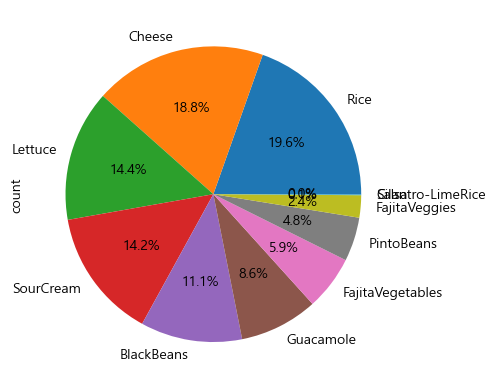

In [268]:
new_df_chipotle["count"].plot.pie( autopct="%.1f%%")
plt.show()